## Web Page Data Scratching

In [141]:
import requests, bs4
from bs4 import BeautifulSoup as bs
import pandas as pd
from datetime import datetime 
import statsmodels.api as sm
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Scraping six years' movie data for analysis.

In [134]:
test_pipeline_list = []
url_base = 'https://www.boxofficemojo.com/year/'
url_list = [url_base+str(i) for i in [2016,2017,2018,2019,2020]]
for url in url_list:
  page = requests.get(url).text
  soup = bs(page)
## weekday or not; start quarantine or not
  for div in soup.find_all(class_='a-section mojo-body aok-relative'):
    title = [title_tag.text for title_tag in div.find_all(class_='a-text-left mojo-field-type-release mojo-cell-wide')]
    theater = [theater_tag.text for theater_tag in div.find_all(class_='a-text-right mojo-field-type-positive_integer')]
    Gross = [int(Gross_tag.text.replace(',','').replace('$','').strip()) for Gross_tag in div.find_all(class_='a-text-right mojo-field-type-money mojo-estimatable')[0:200]]
    release_date = [release_date_tag.text+' '+url[-4:] for release_date_tag in div.find_all(class_='a-text-left mojo-field-type-date a-nowrap')]
    distributer = [distributer_tag.text for distributer_tag in div.find_all(class_='a-text-left mojo-field-type-studio')]
    
    test_pipeline_list = {'title': title, 'Gross': Gross,'theater': theater,'release_date':release_date ,'distributer':distributer}


In [135]:
#pipeline_df.size
pipeline_df = pd.DataFrame(test_pipeline_list)
pipeline_df.head()

,title,Gross,theater,release_date,distributer
0,Bad Boys for Life,204417855,"3,775",Jan 17 2020,Sony Pictures Entertainment (SPE)\n\n
1,1917,206305244,"3,987",Dec 25 2020,Universal Pictures\n\n
2,Sonic the Hedgehog,157901466,"4,198",Feb 14 2020,Paramount Pictures\n\n
3,Jumanji: The Next Level,159227644,"4,227",Dec 13 2020,Sony Pictures Entertainment (SPE)\n\n
4,Star Wars: Episode IX - The Rise of Skywalker,146066470,"4,406",Dec 20 2020,Walt Disney Studios Motion Pictures\n\n


In [136]:
pipeline_df['MONTH'] = [int(datetime.strptime(the_date, '%b %d %Y').month) for the_date in pipeline_df['release_date']]
pipeline_df

,title,Gross,theater,release_date,distributer,MONTH
0,Bad Boys for Life,204417855,"3,775",Jan 17 2020,Sony Pictures Entertainment (SPE)\n\n,1
1,1917,206305244,"3,987",Dec 25 2020,Universal Pictures\n\n,12
2,Sonic the Hedgehog,157901466,"4,198",Feb 14 2020,Paramount Pictures\n\n,2
3,Jumanji: The Next Level,159227644,"4,227",Dec 13 2020,Sony Pictures Entertainment (SPE)\n\n,12
4,Star Wars: Episode IX - The Rise of Skywalker,146066470,"4,406",Dec 20 2020,Walt Disney Studios Motion Pictures\n\n,12
...,...,...,...,...,...,...
195,Follow Me,821000,50,Sep 18 2020,Vertical Entertainment\n\n,9
196,Extra Ordinary,793525,80,Mar 6 2020,Good Deed Entertainment\n\n,3
197,Palm Springs,793525,66,Jul 10 2020,Neon\n\n,7
198,A Call to Spy,792488,79,Oct 2 2020,IFC Films\n\n,10


In [137]:
#movie_data = pipeline_df.groupby(["MONTH"])['Gross'].sum()
#movie_data.head(15)

In [172]:
Y = pipeline_df['Gross']
X = pipeline_df.drop(columns = ["title","theater","release_date",'distributer','Gross'])
X = sm.add_constant(X)
model = sm.OLS(Y,X,data = pipeline_df)
movie_model = model.fit()
movie_model.summary()
ypred = movie_model.predict(X)

/home/yingqing/anaconda3/envs/metis/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<AxesSubplot:xlabel='MONTH', ylabel='Gross'>

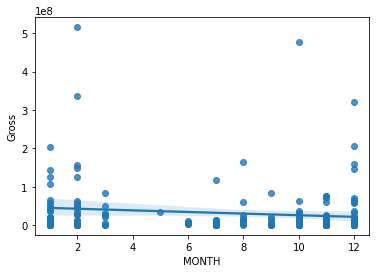

In [157]:
sns.regplot(x = 'MONTH',y = 'Gross',data = pipeline_df)

In [169]:
X

,const,MONTH
0,1.0,1
1,1.0,12
2,1.0,2
3,1.0,12
4,1.0,12
...,...,...
195,1.0,9
196,1.0,3
197,1.0,7
198,1.0,10


AttributeError: 'PathCollection' object has no attribute 'savefig'

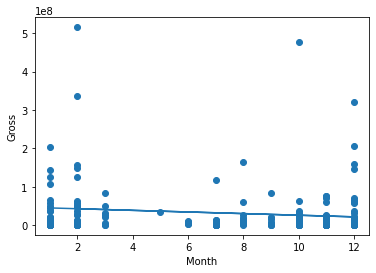

In [200]:
plt.scatter(X['MONTH'],Y)
plt.plot(X['MONTH'],ypred)
plt.xlabel('Month')
plt.ylabel('Gross')

fig.savefig('/home/yingqing/Documents/Metis bootcamp/Regression/Regression_project/plot1.png', bbox_inches='tight')

In [193]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=10)
xp = polynomial_features.fit_transform(X)
xp.shape

(200, 66)

In [194]:
pd.DataFrame(xp)

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000e+00,1.000000e+00
1,1.0,1.0,12.0,1.0,12.0,144.0,1.0,12.0,144.0,1728.0,...,12.0,144.0,1728.0,20736.0,248832.0,2985984.0,35831808.0,429981696.0,5.159780e+09,6.191736e+10
2,1.0,1.0,2.0,1.0,2.0,4.0,1.0,2.0,4.0,8.0,...,2.0,4.0,8.0,16.0,32.0,64.0,128.0,256.0,5.120000e+02,1.024000e+03
3,1.0,1.0,12.0,1.0,12.0,144.0,1.0,12.0,144.0,1728.0,...,12.0,144.0,1728.0,20736.0,248832.0,2985984.0,35831808.0,429981696.0,5.159780e+09,6.191736e+10
4,1.0,1.0,12.0,1.0,12.0,144.0,1.0,12.0,144.0,1728.0,...,12.0,144.0,1728.0,20736.0,248832.0,2985984.0,35831808.0,429981696.0,5.159780e+09,6.191736e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.0,1.0,9.0,1.0,9.0,81.0,1.0,9.0,81.0,729.0,...,9.0,81.0,729.0,6561.0,59049.0,531441.0,4782969.0,43046721.0,3.874205e+08,3.486784e+09
196,1.0,1.0,3.0,1.0,3.0,9.0,1.0,3.0,9.0,27.0,...,3.0,9.0,27.0,81.0,243.0,729.0,2187.0,6561.0,1.968300e+04,5.904900e+04
197,1.0,1.0,7.0,1.0,7.0,49.0,1.0,7.0,49.0,343.0,...,7.0,49.0,343.0,2401.0,16807.0,117649.0,823543.0,5764801.0,4.035361e+07,2.824752e+08
198,1.0,1.0,10.0,1.0,10.0,100.0,1.0,10.0,100.0,1000.0,...,10.0,100.0,1000.0,10000.0,100000.0,1000000.0,10000000.0,100000000.0,1.000000e+09,1.000000e+10


In [195]:
model2 = sm.OLS(Y,xp,data = pipeline_df)
movie_model2 = model2.fit()
movie_model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Gross   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     1.545
Date:                Thu, 28 Oct 2021   Prob (F-statistic):              0.135
Time:                        18:08:55   Log-Likelihood:                -3882.2
No. Observations:                 200   AIC:                             7784.
Df Residuals:                     190   BIC:                             7817.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.538e+08   2.21e+09      0.160      0.873      -4e+09    4.71e+09
x1          3.553e+08   2.21e+09      0.160      0.873   -4.01e+09    4.72e+09
x2         -1.132e+09   6.53e+09     -0.173      0.863    -1.4e+10    1.18e+10
x3          3.539e+08   2.21e+09      0.160      0.873      -4e+09    4.71e+09
x4         -1.132e+09   6.53e+09     -0.173      0.863    -1.4e+10    1.18e+10
x5          1.488e+09   7.77e+09      0.191      0.848   -1.38e+10    1.68e+10
x6          3.539e+08   2.21e+09      0.160      0.873      -4e+09    4.71e+09
x7         -1.132e+09   6.53e+09     -0.173      0.863    -1.4e+10    1.18e+10
x8          1.488e+09   7.77e+09      0.191      0.848   -1.38e+10    1.68e+10
x9         -1.062e+09   5.02e+09     -0.211      0.833    -1.1e+10    8.85e+09
x10         3.539e+08   2.21e+09      0.160      0.873      -4e+09    4.71e+09
x11        -1.132e+09   6.53e+09     -0.173      0.863    -1.4e+10    1.18e+10
x12         1.488e+09   7.77e+09      0.191      0.848   -1.38e+10    1.68e+10
x13        -1.062e+09   5.02e+09     -0.211      0.833    -1.1e+10    8.85e+09
x14         4.635e+08   1.99e+09      0.233      0.816   -3.47e+09     4.4e+09
x15         3.539e+08   2.21e+09      0.160      0.873      -4e+09    4.71e+09
x16        -1.132e+09   6.53e+09     -0.173      0.863    -1.4e+10    1.18e+10
x17         1.488e+09   7.77e+09      0.191      0.848   -1.38e+10    1.68e+10
x18        -1.062e+09   5.02e+09     -0.211      0.833    -1.1e+10    8.85e+09
x19         4.635e+08   1.99e+09      0.233      0.816   -3.47e+09     4.4e+09
x20        -1.313e+08   5.17e+08     -0.254      0.800   -1.15e+09    8.88e+08
x21         3.539e+08   2.21e+09      0.160      0.873      -4e+09    4.71e+09
x22        -1.132e+09   6.53e+09     -0.173      0.863    -1.4e+10    1.18e+10
x23         1.488e+09   7.77e+09      0.191      0.848   -1.38e+10    1.68e+10
x24        -1.062e+09   5.02e+09     -0.211      0.833    -1.1e+10    8.85e+09
x25         4.635e+08   1.99e+09      0.233      0.816   -3.47e+09     4.4e+09
x26        -1.313e+08   5.17e+08     -0.254      0.800   -1.15e+09    8.88e+08
x27         2.489e+07   9.04e+07      0.275      0.783   -1.53e+08    2.03e+08
x28         3.539e+08   2.21e+09      0.160      0.873      -4e+09    4.71e+09
x29        -1.132e+09   6.53e+09     -0.173      0.863    -1.4e+10    1.18e+10
x30         1.488e+09   7.77e+09      0.191      0.848   -1.38e+10    1.68e+10
x31        -1.062e+09   5.02e+09     -0.211      0.833    -1.1e+10    8.85e+09
x32         4.635e+08   1.99e+09      0.233      0.816   -3.47e+09     4.4e+09
x33        -1.313e+08   5.17e+08     -0.254      0.800   -1.15e+09    8.88e+08
x34         2.489e+07   9.04e+07      0.275      0.783   -1.53e+08    2.03e+08
x35        -3.196e+06   1.08e+07     -0.295      0.768   -2.45e+07    1.81e+07
x3

Text(0, 0.5, 'Gross')

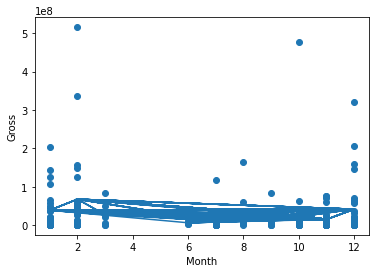

In [198]:
ypred2 = movie_model2.predict(xp)
plt.scatter(X['MONTH'],Y)
plt.plot(X['MONTH'],ypred2)
plt.xlabel('Month')
plt.ylabel('Gross')
fig.savefig('/home/yingqing/Documents/Metis bootcamp/Regression/Regression_project/plot2.png', bbox_inches='tight')